# Key concepts

We begin with an explanation of some key concepts from climatology.

## Longwave radiation

In climate science, **longwave radiation** (LWR) is electromagnetic thermal radiation emitted by Earth's surface, atmosphere, and clouds. It may also be referred to as terrestrial radiation. This radiation is in the infrared portion of the spectrum, but is distinct from the shortwave (SW) near-infrared radiation found in sunlight.

Outgoing longwave radiation (OLR) is the longwave radiation emitted to space from the top of Earth's atmosphere. It may also be referred to as emitted terrestrial radiation. Outgoing longwave radiation plays an important role in planetary cooling. Emitting outgoing longwave radiation is the only way Earth loses energy to space, i.e., the only way the planet cools itself. Radiative heating from absorbed sunlight, and radiative cooling to space via OLR power the heat engine that drives atmospheric dynamics.

The balance between OLR (energy lost) and incoming solar shortwave radiation (energy gained) determines whether the Earth is experiencing global heating or cooling.

## Insolation

**Solar irradiance** is the power per unit area (surface power density) received from the Sun in the form of electromagnetic radiation in the wavelength range of the measuring instrument. 

Solar irradiance is often integrated over a given time period in order to report the radiant energy emitted into the surrounding environment (joule per square metre, $\frac{J}{m^2}$) during that time period. This integrated solar irradiance is called solar irradiation, solar exposure, solar insolation, or **insolation**.

Irradiance may be measured in space or at the Earth's surface after atmospheric absorption and scattering. Irradiance in space is a function of distance from the Sun, the solar cycle, and cross-cycle changes. Irradiance on the Earth's surface additionally depends on the tilt of the measuring surface, the height of the Sun above the horizon, and atmospheric conditions. Solar irradiance affects plant metabolism and animal behavior.

The study and measurement of solar irradiance have several important applications, including the prediction of energy generation from solar power plants, the heating and cooling loads of buildings, climate modeling and weather forecasting, passive daytime radiative cooling applications, and space travel. 

## Albedo

**Albedo** is the fraction of sunlight that is diffusely reflected by a body. It is measured on a scale from 0 (corresponding to a black body that absorbs all incident radiation) to 1 (corresponding to a body that reflects all incident radiation).

Surface albedo is defined as the ratio of radiosity $J_e$ to the irradiance $E_e$ (flux per unit area) received by a surface. The proportion reflected is not only determined by properties of the surface itself, but also by the spectral and angular distribution of solar radiation reaching the Earth's surface. These factors vary with atmospheric composition, geographic location, and time. While bi-hemispherical reflectance is calculated for a single angle of incidence (i.e., for a given position of the Sun), albedo is the directional integration of reflectance over all solar angles in a given period. The temporal resolution may range from seconds (as obtained from flux measurements) to daily, monthly, or annual averages. 

**Ice–albedo feedback** is a positive feedback climate process where a change in the area of ice caps, glaciers, and sea ice alters the albedo and surface temperature of a planet. Ice is very reflective, therefore it reflects far more solar energy back to space than the other types of land area or open water. Ice–albedo feedback plays an important role in global climate change.

## The meridional heat transport

The **meridional heat transport** is related to earth's radiation budget. The energy absorbed at a given point on earth is determined by it's latitudinal location. The tropical regions on average receive the most solar radiation per year. Towards the poles the intensity of the radiation declines, which means there is an uneven distribution of incoming energy. This imbalance would lead to a gradual cooling of the poles and a warming of the tropical regions. Since this is not the case, the net energy loss at the poles has to be compensated by the net energy gain in tropical regions. 

Long wave radiation emitted by the earth is slightly higher at lower latitudes but still not high enough to balance the system. Therefore, heat has to be transported from high latitudes polewards. This energy or heat transport can either occur through the atmosphere or through the ocean, it is called the meridional heat transport.

## Sources


-  Matthews, J.B.R.; Möller, V.; van Diemenn, R.; Fuglesvedt, J.R.; et al. (2021-08-09). "Annex VII: Glossary".

-  "Earth's Heat Balance". Energy Education. University of Calgary. Retrieved 12 July 2023.

-  Singh, Martin S.; O’Neill, Morgan E. (2022). "Thermodynamics of the climate system". Retrieved 12 July 2023.

-  Kiehl, J. T.; Trenberth, Kevin E. (February 1997). "Earth's Annual Global Mean Energy Budget".

-  Michael Boxwell, Solar Electricity Handbook: A Simple, Practical Guide to Solar Energy (2012).

-  Stickler, Greg. "Educational Brief - Solar Radiation and the Earth System". Retrieved 5 May 2016.

-  C.Michael Hogan. 2010. Abiotic factor. Encyclopedia of Earth. eds Emily Monosson and C. Cleveland. National Council for Science and the Environment. 

-  Pharr; Humphreys. "Fundamentals of Rendering - Radiometry / Photometry". Retrieved 2 March 2022.

-  Coakley, J. A. (2003). "Reflectance and albedo, surface". Archived from the original on 9 October 2022.

-  Budyko, M. I. (1 January 1969). "The effect of solar radiation variations on the climate of the Earth".

-  Brown, E. et al (2001): "Ocean Circulation".

# The model

$$T_t(\theta, t)=Q\cdot s(\theta)\cdot (1-\alpha (\theta, \eta))-r(T)-h(T)$$

$$T(\theta,0)=T_0(\theta)$$

Where:

-  $T(\theta,t)$ is the average temperature at $\theta$ latitude ($\theta \in [-90^{\circ}, 90^{\circ}]$) at $t$ time ($t \geq 0$).

-  $A, B, C, Q$ are nonnegative constants that stem from empirical measurements. ($A = 202, B = 1.9, C = 3.04, Q = 343$)

-  $s(\theta)=1.241 - 0.723\cdot \sin^2{(\theta)}$ is the insolation function. 


-  $\alpha(\theta, \eta)=
    \begin{cases}
        \alpha_1 & \text{if } sin{(\theta)}<\eta\\
        \alpha_2 & \text{if } sin{(\theta)}>\eta\\
        \frac{\alpha_1+\alpha_2}{2} & \text{if } sin{(\theta)}=\eta
    \end{cases}
$ is the albedo function. ($\alpha_1 = 0.32, \alpha_2 = 0.62$, $\eta$ is the latitude, at which glaciers appear.)


-  $r(T) = A + B\cdot T(\theta, t)$ is the longwave radiation function.

-  $h(T) = C\cdot (T(\theta,t)-\frac{1}{180}\int_{-90}^{90}T(\theta,t)d\theta)$ is the heat transport function.

# Calculations

## Important packages

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import warnings

## The Model Class

In [2]:
A, B, C, Q = 202, 1.9, 3.04, 343

def insolation(theta):
    return 1.241 - 0.723 * np.sin(theta)**2

def albedo(theta, eta):
    if np.sin(theta) < eta:
        return 0.32
    if np.sin(theta) > eta:
        return 0.62
    return (0.32 + 0.62)/2

def radiation(T):
    return A + B * T

def heat(T, integral):
    return C * (T - integral/180)

class temperature_map:
    def __init__(self, temp_data, eta):
        with warnings.catch_warnings():
            warnings.simplefilter(action='ignore', category=FutureWarning)
            warnings.simplefilter(action='ignore', category=UserWarning)
            world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
            world = world.drop(columns=['pop_est', 'continent', 'name', 'gdp_md_est'])
            world = world.to_crs(4326)
            world['lats'] = world.centroid.y
            world = world.sort_values(by="iso_a3").reset_index()
            world['temp'] = temp_data['temp']
        self.world = world
        self.lats = world['lats']
        self.temp = world['temp']
        self.eta = eta

    def map(self):
        fig, ax = plt.subplots(figsize=(16, 10))
        self.world.plot(figsize=(16, 10),column='temp', legend=True, cmap="rainbow", vmin=-60, vmax=40,
           legend_kwds={"label": "Celcius degrees", "orientation": "horizontal"}, ax=ax)
        ax.set_title("Average Temperatures per Country")
        labels_x = []
        labels_y = []

        for x in np.arange(-180, 181, 30):
            plt.axvline(x, c='green', linestyle="--", linewidth=0.5)
            labels_x.append(str(x)+'\u00b0')

        plt.xticks(np.arange(-180, 181, 30), labels_x)

        for y in np.arange(-90, 91, 30):
            plt.axhline(y, c='green', linestyle="--", linewidth=1)
            labels_y.append(str(y)+'\u00b0')
        plt.axhline(self.eta, c='blue', linestyle="--", linewidth=1)

        plt.yticks(np.insert(np.arange(-90, 91, 30), len(np.arange(-90, 91, 30)), self.eta), labels_y.append('eta'))

    def cost_function(self):
        return (sum(self.temp >= 40) + sum(self.temp <= -60))/177

    def predict(self, current_year, years, h):
        temperatures = [self.temp]
        h = 0.1
        for i in range(int(years/h)):
            temperatures.append(temperatures[i] + h * (Q * insolation(self.lats[0]) * (1 - albedo(self.lats[0], self.eta)) 
            - radiation(temperatures[i]) - heat(temperatures[i], sum(temperatures[i]))))
        world_states = {}
        for i in range(years+1):
            new_data = pd.DataFrame(temperatures[int(i/h)])
            world_states[current_year + i] = temperature_map(new_data, self.eta)
        return world_states

## Model Analysis

In [3]:
data = pd.read_excel(r'C:\Users\Maciej\Desktop\temps.xlsx')
model = temperature_map(data, 70)

DataFrame, showcasing average temperature for each country.

In [4]:
model.world

,index,iso_a3,geometry,lats,temp
0,174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",42.579367,9.500000
1,103,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",33.856399,12.921455
2,74,AGO,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",-12.245869,21.510933
3,125,ALB,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",41.141353,11.269800
4,84,ARE,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",23.868634,26.825609
...,...,...,...,...,...
172,89,VUT,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",-15.542677,23.157169
173,157,YEM,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",15.913232,17.596873
174,25,ZAF,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",-28.947033,21.584132
175,70,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",-13.395068,21.031390


A mapping tool.

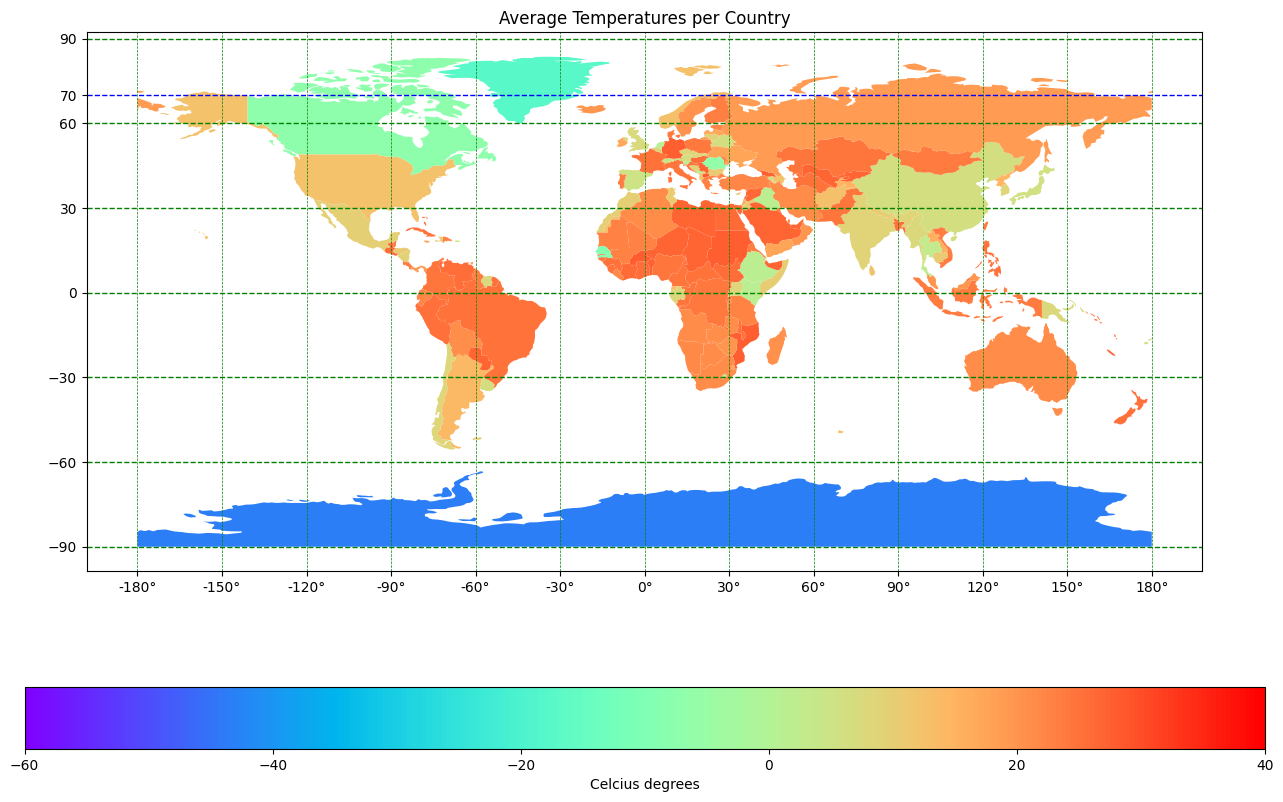

In [5]:
model.map()

Cost function, which helps to evaluate earth's inhabitability.

In [6]:
model.cost_function()

0.0

Predictions of future temperatures.

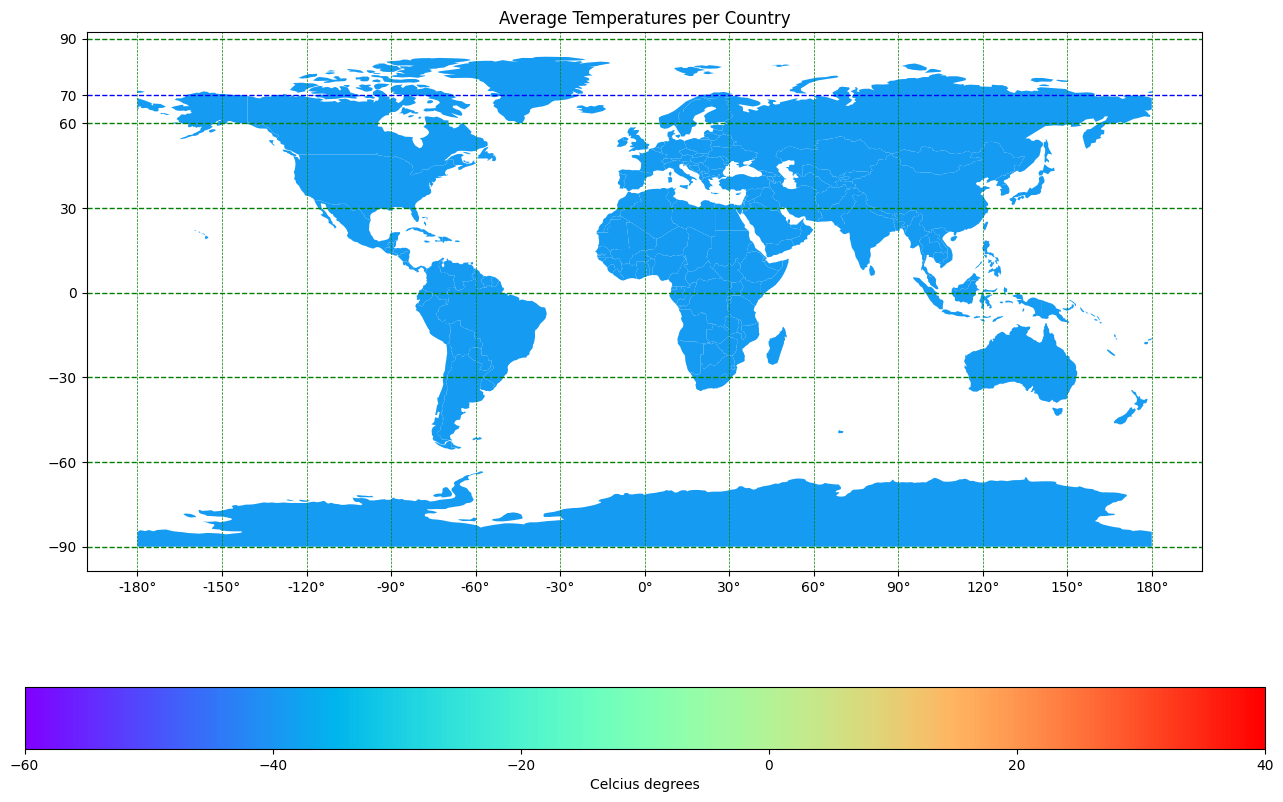

In [7]:
preds = model.predict(2024, 10, 0.1)
preds[2030].map()

Animation of our predictions.

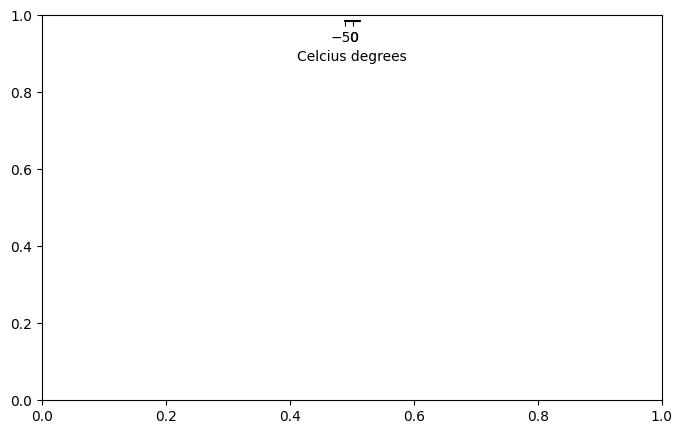

In [11]:
import matplotlib.animation as anim

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Average Temperatures per Country")

def animation(j):
    plt.clf()
    plot = preds[2024+j].world.plot(column='temp', legend=True, cmap="rainbow", vmin=-60, vmax=40,
           legend_kwds={"label": "Celcius degrees", "orientation": "horizontal"}, ax=ax)

    return plot

animate = anim.FuncAnimation(fig,
                            func = animation,
                            frames = len(preds),
                            interval = 200,
                            blit = False
                            )

plt.rc('animation', html='jshtml')
animate